## <font color='blue'> Probability Distributions and The Central Limit Theorem</font>

### <font color='blue'>Probability Density Functions</font>

A **probability density function (PDF)** is a function that describes the relative likelihood of a continuous random variable taking on a specific value. It is used to characterize the distribution of probabilities across the possible values of the random variable.

### Important Properties:
i. **Non-Negativity**: The value of the PDF is always non-negative for all possible values of the random variable:  
   $$
   f(x) \geq 0 \quad \forall \, x
   $$

ii. **Normalization**: The total area under the curve of the PDF over all possible values of the random variable is equal to 1, ensuring it represents a valid probability distribution:
   $$
   \int_{-\infty}^{\infty} f(x) \, dx = 1
   $$

iii. **Probability Interpretation**: The probability that the random variable $ X $ falls within a particular range $[a, b]$ is given by the integral of the PDF over that range:
   $$
   P(a \leq X \leq b) = \int_{a}^{b} f(x) \, dx
   $$

That is to say the area under the graph of the density function when $X$ is between $a$ and $b.$ The integral sign means **accumulation** or **sum** of all frequencies over a given interval.

### <font color='blue'> Normal Distribution</font>


Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science. You will encounter it at many places especially in topics of statistical inference. It is one of the assumptions of many data science algorithms too.

A normal distribution has a bell-shaped density curve described by its mean μ and standard deviation σ. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. The probability distribution function of a normal density curve with mean μ and standard deviation σ at a given point x is given by:

$$\large f(x):=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

If the mean is 0 and the standard deviation is 1 then the probability density function is:

$$\large f(x):=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

### <font color='blue'> $\chi^2$ Distribution </font>
The chi-square distribution is useful for modeling the distribution of the sample variance for normally distributed random variables.

Sample variance:

$$\large \frac{\sum\limits_{i=1}^{n}(X_i-\bar{X})^2}{n-1}$$

The sample is a collection of the values $X_1,X_2,X_3,...X_n$ and  $\bar{X}$ is the mean of the sample.

For $n$ degrees of freedom, the $\chi^2$ probability distribution function is:
$$\large f(x):=\begin{cases} \frac{1}{2^{\frac{n}{2}}\Gamma\left(\frac{n}{2}\right)} x^{\frac{n}{2}-1}e^{-\frac{x}{2}} &\text{if}& x\geq 0 \\
0 &\text{if}& x<0. \end{cases}$$

where $\large \Gamma(x)=\int\limits_{0}^{\infty}x^{n-1}\cdot e^{-x}dx$. For positive integers we have $\large Γ(n)=(n-1)!$

### <font color='blue'> Gamma Distribution </font>

The gamma distribution is a two-parameter family of continuous probability distributions. Exponential, chi-squared, erlang distributions are special cases of the gamma distribution. The gamma distribution can be parameterized in terms of a shape parameter α=k and an inverse scale parameter β=1/θ, called a rate parameter., the notation Γ(n) represents the gamma function and is defined as (n−1)!

The probability distribution function is:

$$\large f(x,\alpha,\beta):=\frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1}e^{-\beta x}$$

where $x, \alpha , \beta>0$

### <font color='blue'> Beta Distribution </font>

The beta distribution is also a two-parameter family of continuous probability distributions with the following probability density function:
$$\large f(x,\alpha,\beta):= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}\cdot(1-x)^{\beta-1}$$

where $\Gamma$ is the Gamma function.

### <font color='blue'> Exponential Distribution </font>

The exponential distribution describes the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate. The distribution has a parameter λ called rate parameter, and its probability density function is:

$$\large f(x,\lambda):=\begin{cases} \lambda e^{-\lambda x} &\text{if}& x\geq 0 \\
0 &\text{if}& x<0. \end{cases}$$


### <font color='blue'> Poisson Distribution </font>

Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of a Poisson process. Poisson distribution is described in terms of the rate (μ) at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated λ (lambda). Lambda is the event rate, also called the rate parameter. The probability of observing k events in an interval is modeled by the equation:

$$\large P(k \text{ events in an interval}):=e^{-\lambda}\frac{\lambda^k}{k!}$$

where $\lambda$ represents the average number of events in that interval.

### <font color='blue' size=5pt> The Central Limit Theorem </font>

In many situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a bell curve) even if the original variables themselves are not normally distributed.

Here $n$ refers to the sample size and $X_1, X_2, X_3...X_n$ are independently sampled values from the same distribution with mean $\mu$ and standard deviation $\sigma$. Then the sample mean $\bar{X}$ is almost following a normal distribution if $n$ is big enough. That normal distribution has mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$

## <font color='blue'> Code Applications </font>
---

In [ ]:
# Setup Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# this is for displaying plots with high resolution
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

from scipy import stats # helps with many distribution functions
from scipy.stats import beta, gamma, expon, poisson, uniform, norm, chi2
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [ ]:
# useful class for the visualization of frequencies
class distribution_plot:
  def __init__(self,dist,bins=11,hist_color='lightblue',pdf_color='red',fill_region=False,fill_color='lightgreen',fill_bounds=[-1,1],edge_color='k',lw_pdf=2):
    self.dist = dist
    self.bins = bins
    self.hist_color = hist_color
    self.pdf_color = pdf_color
    self.edgecolor = edge_color
    self.lw_pdf = lw_pdf
    self.fill_region = fill_region
    self.fill_color = fill_color
    self.fill_bounds = fill_bounds


  def fit(self,data):
    fig, ax = plt.subplots(figsize=(6, 5))
    # Create the histogram
    sns.histplot(data,
                bins=self.bins,
                kde=False,
                color=self.hist_color,
                alpha=0.5,
                edgecolor=self.edgecolor,
                ax=ax)

    # Calculate the parameters for the normal distribution fit
    params = self.dist.fit(data)

    # Create the x values for the normal distribution curve
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)

    # Calculate the y values for the normal distribution curve
    p = self.dist.pdf(x, *params)

    # Plot the normal distribution curve, scaling it to the histogram
    # We need to scale it because histplot uses counts, while norm.pdf is a density
    scale_factor = len(data) * (xmax - xmin) / self.bins # Approximate bin width
    ax.plot(x, p * scale_factor, 'r', linewidth=self.lw_pdf)

    ax.set_xlabel('Random Variable', fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.set_title('Data Distribution', fontsize=16)
    if self.fill_region:
      l = ax.lines[0]
      xx = l.get_xydata()[:,0]
      yy = l.get_xydata()[:,1]
      ax.fill_between(xx,yy, where=(self.fill_bounds[0]<=xx) & (xx <= self.fill_bounds[1]), color=self.fill_color,alpha=0.5)

    # plt.savefig('example_distribution.png',dpi=300)
    plt.show()

### <font color='blue'>Visualize Distributions of Random Variables</font>

In [ ]:
# how to sample from a known distribution
x = stats.uniform.rvs(size=10000,loc=1,scale=9)

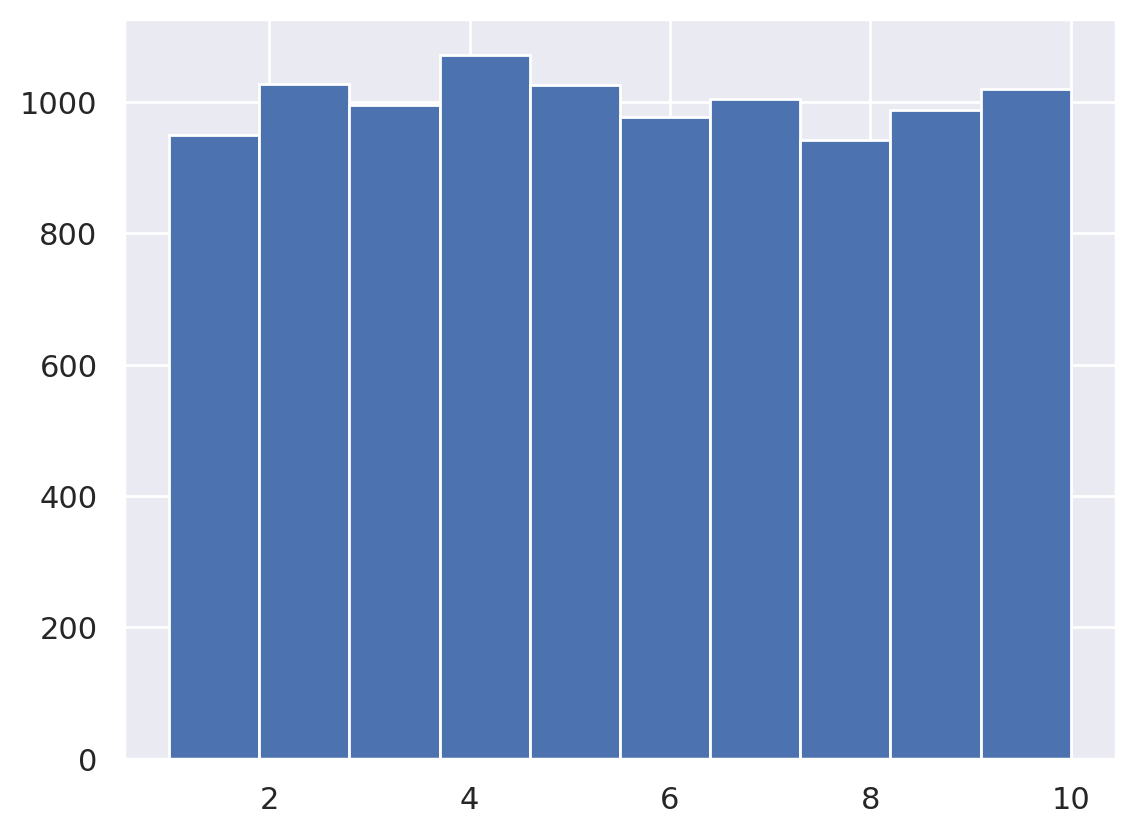

In [ ]:
plt.hist(x)
plt.show()

In [ ]:
x # we just got random numbers between -1 and 1

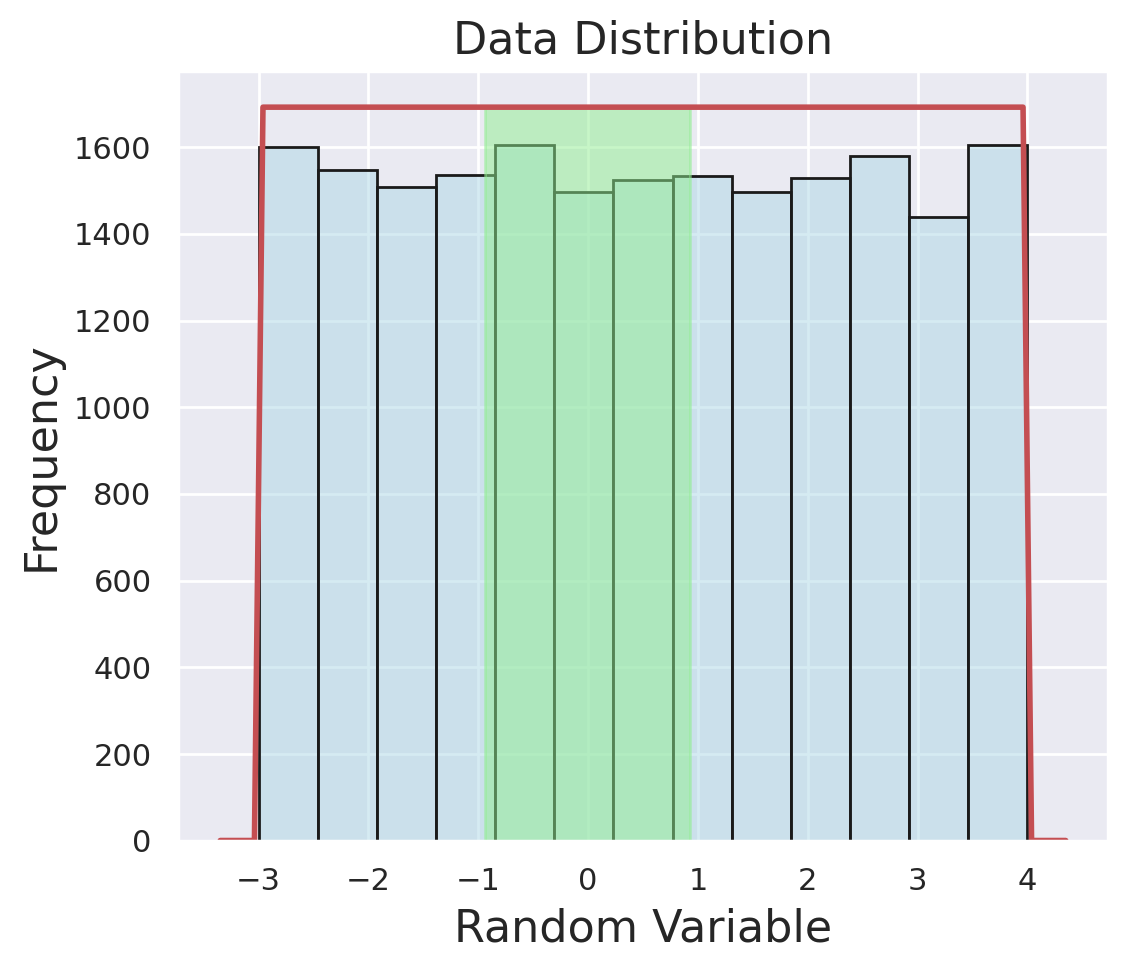

In [ ]:
# uniform distribution
# Generate random values
n = 20000
a = -3
b = 7
data_uniform = uniform.rvs(size=n, loc = a, scale=b) # this is the actual sampling
show_dist = distribution_plot(uniform,fill_region=True,bins=13,pdf_color='red')
show_dist.fit(data_uniform)

In [ ]:
n=2500
new_data = uniform.rvs(size=n, loc = -1, scale=3)

In [ ]:
new_data

array([0.437252, -0.520474, 0.840885, ..., -0.791102, -0.563702, 0.137665])

Example: suppose we want to evaluate the probability that the random variable is between 0 and 0.25.

$$P(0<X<0.25) = \frac{0.25-0}{3}=\frac{0.25}{3}$$

In [ ]:
idx = ((new_data>=0) & (new_data<0.25))

In [ ]:
idx

array([False, False, False, ..., False, False,  True])

In [ ]:
# here we can count how many hits we got inside of the prescribed interval
count = sum((idx==True))

In [ ]:
# so the probability that the random variable is between 0 and 0.1 is estimated as
count/n

0.0856

In [ ]:
# the theoretical value would be
0.25/3

0.08333333333333333

**Exercise:** What is the exact value for $P(0<X<0.1)?$

**Exercise:** What is the function $f$ for a uniform distribution? How can we find the probability that $a<X<b$ given two values $a$ and $b$?

Let's have an example with the **uniform** distribution:

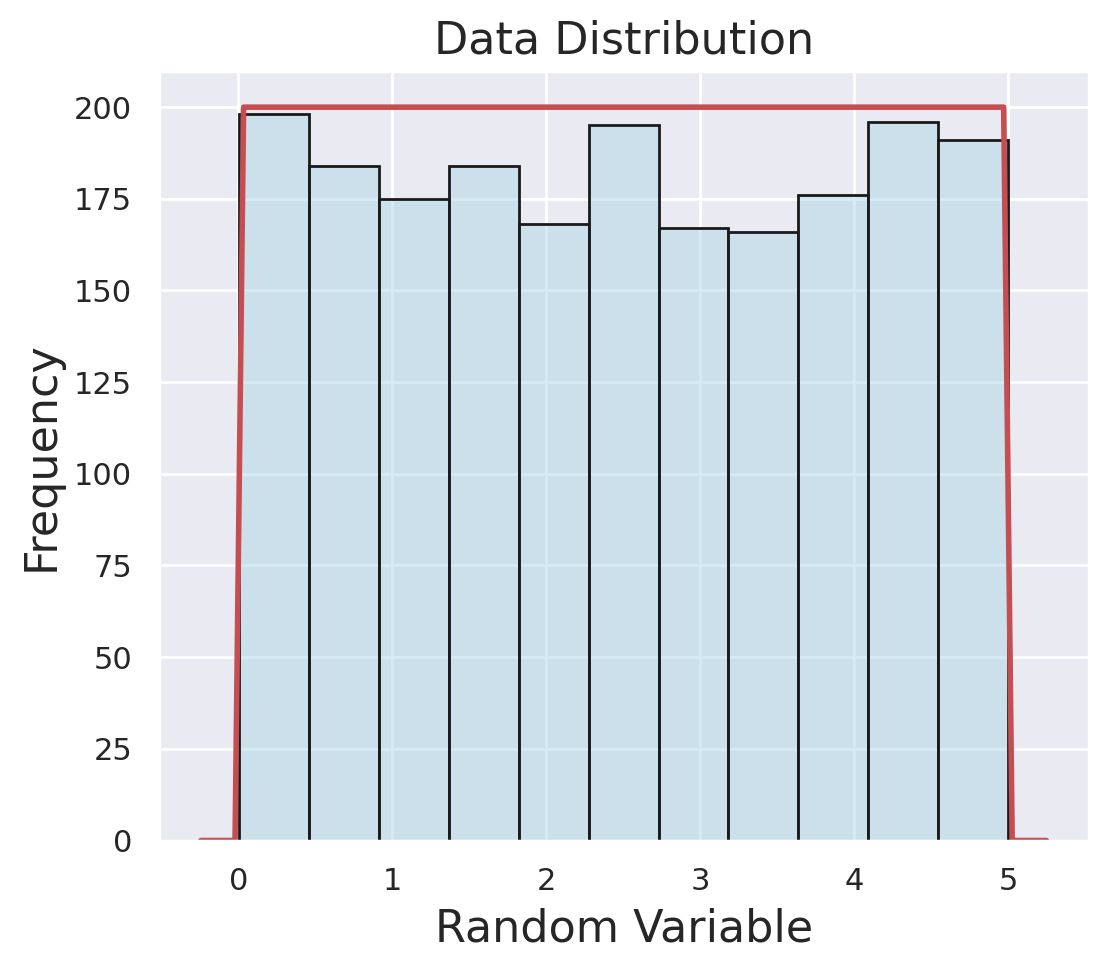

In [ ]:
n = 2000
a = 0
b = 5
data_uniform = stats.uniform.rvs(size=n, loc = a, scale=b)
show_dist = distribution_plot(uniform,bins=11,pdf_color='red')
show_dist.fit(data_uniform)

Now we compute

$$\large P\left( a<X<b\right)$$

by using a Monte Carlo simulation (experimental probability)

In [ ]:
n = 1000000
rv = uniform.rvs(size=n, loc = -1, scale=4)

In [ ]:
count = ((rv>=0) & (rv<=1.5)) + 0

In [ ]:
sum(count)/n

0.375151

In [ ]:
15/40

0.375

### Example with Normal Distributions


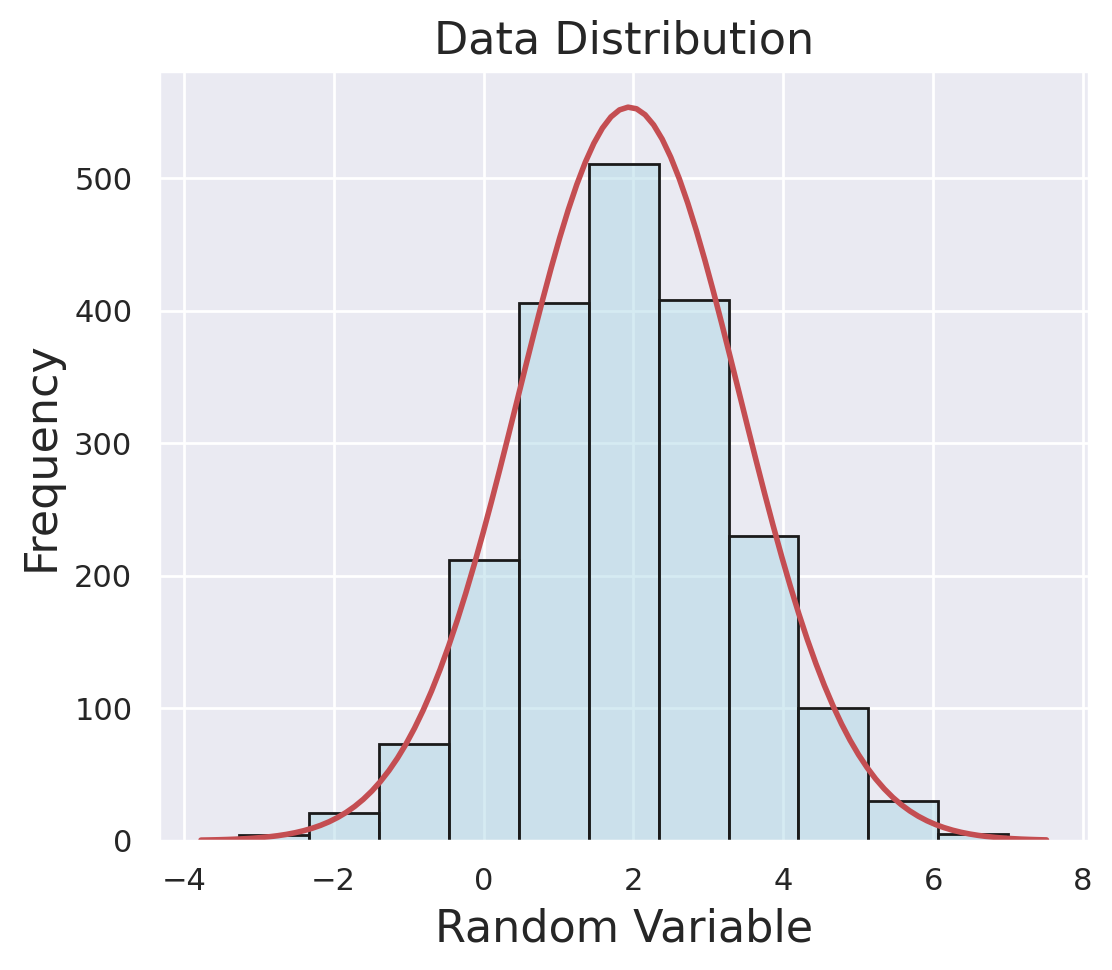

In [ ]:
# generate random numbers from N(mu,sigma)
data_normal = norm.rvs(size=2000,loc=2,scale=1.5) # here for the normal loc means mean and scale means standard deviation
# then we want to display the histogram and the fit of the underlying distribution:
show_dist = distribution_plot(norm,bins=11,pdf_color='red')
show_dist.fit(data_normal)

In [ ]:
n=1000
X = norm.rvs(size=n,loc=-3,scale=10,random_state=1234)

In [ ]:
np.std(X)

9.730661993772294

In [ ]:
# inclass problem: compute the probability for the above distribution that X is between -21 and -13
sum((X>-21)&(X<-13))/n

0.106

In [ ]:
sum((X>-2)&(X<0))/n # experimental probability

0.023

In [ ]:
n = 10
X = norm.rvs(size=n,loc=5,scale=3,random_state=310)

In [ ]:
X

array([6.60603559, 8.03468975, 5.21690322, 5.93232983, 2.93556184,
       8.11857141, 5.53238041, 3.5402976 , 3.29294811, 5.14962716])

### Example with the $\chi$-squared distribution

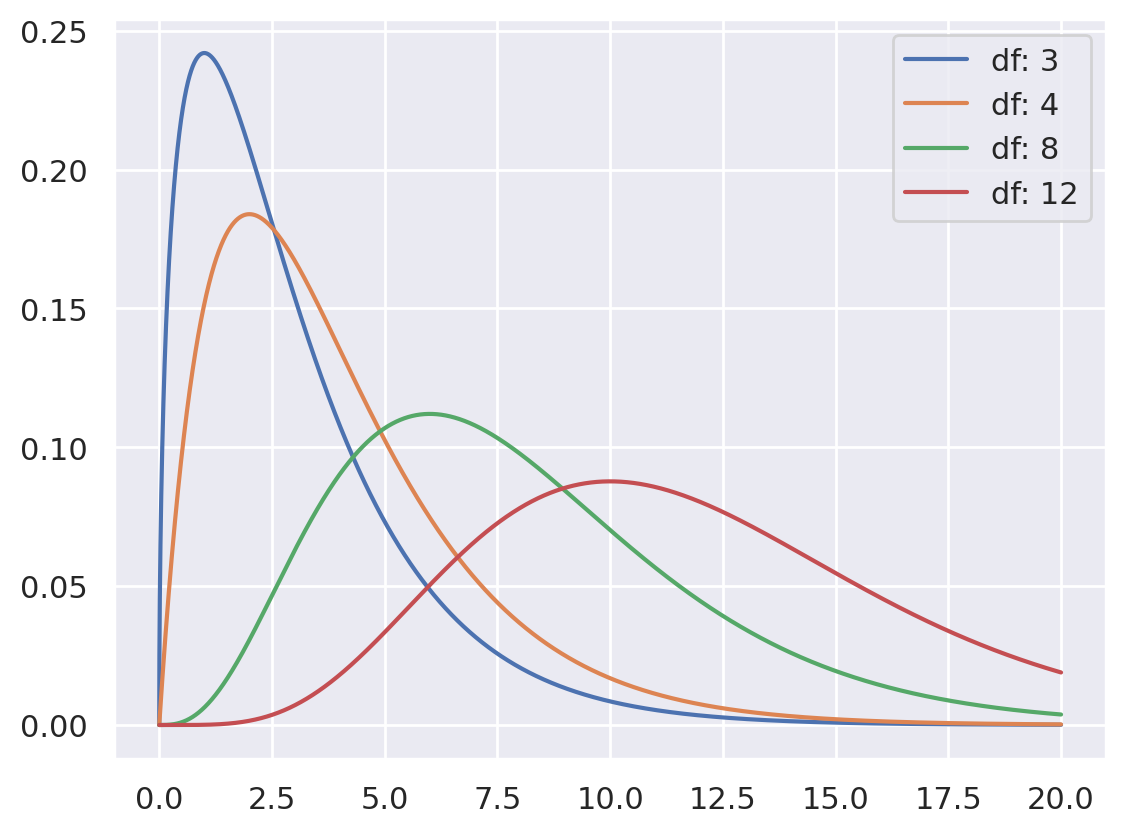

In [ ]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#define multiple Chi-square distributions
plt.plot(x, chi2.pdf(x, df=3), label='df: 3')
plt.plot(x, chi2.pdf(x, df=4), label='df: 4')
plt.plot(x, chi2.pdf(x, df=8), label='df: 8')
plt.plot(x, chi2.pdf(x, df=12), label='df: 12')

#add legend to plot
plt.legend()
plt.show()

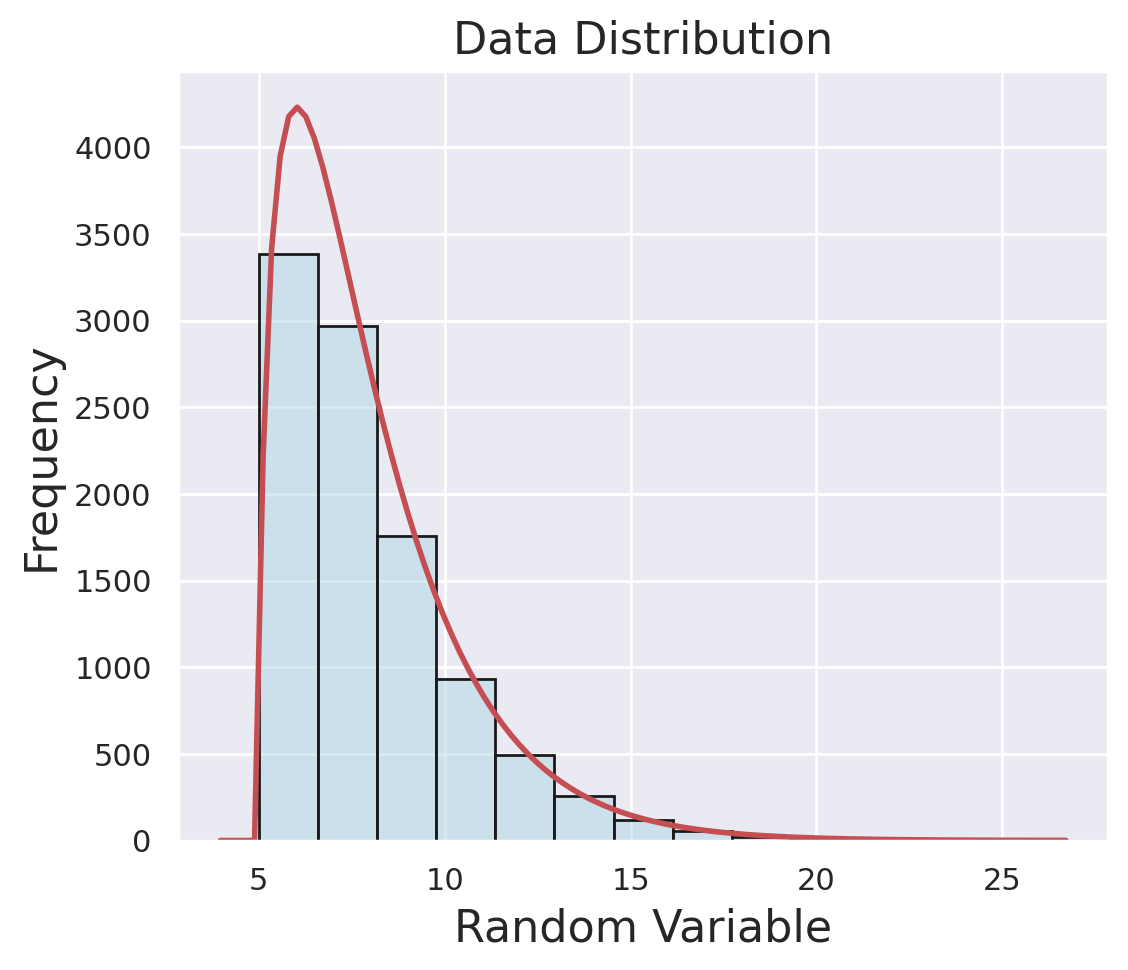

In [ ]:
# example with gamma distribution
data_gamma = gamma.rvs(a=1.5,loc=5,scale=2, size=10000)
# here "scale" means 1/beta
# then we want to display the histogram and the fit of the underlying distribution:
show_dist = distribution_plot(gamma,bins=13,pdf_color='red')
show_dist.fit(data_gamma)

### Example with Beta Distributions

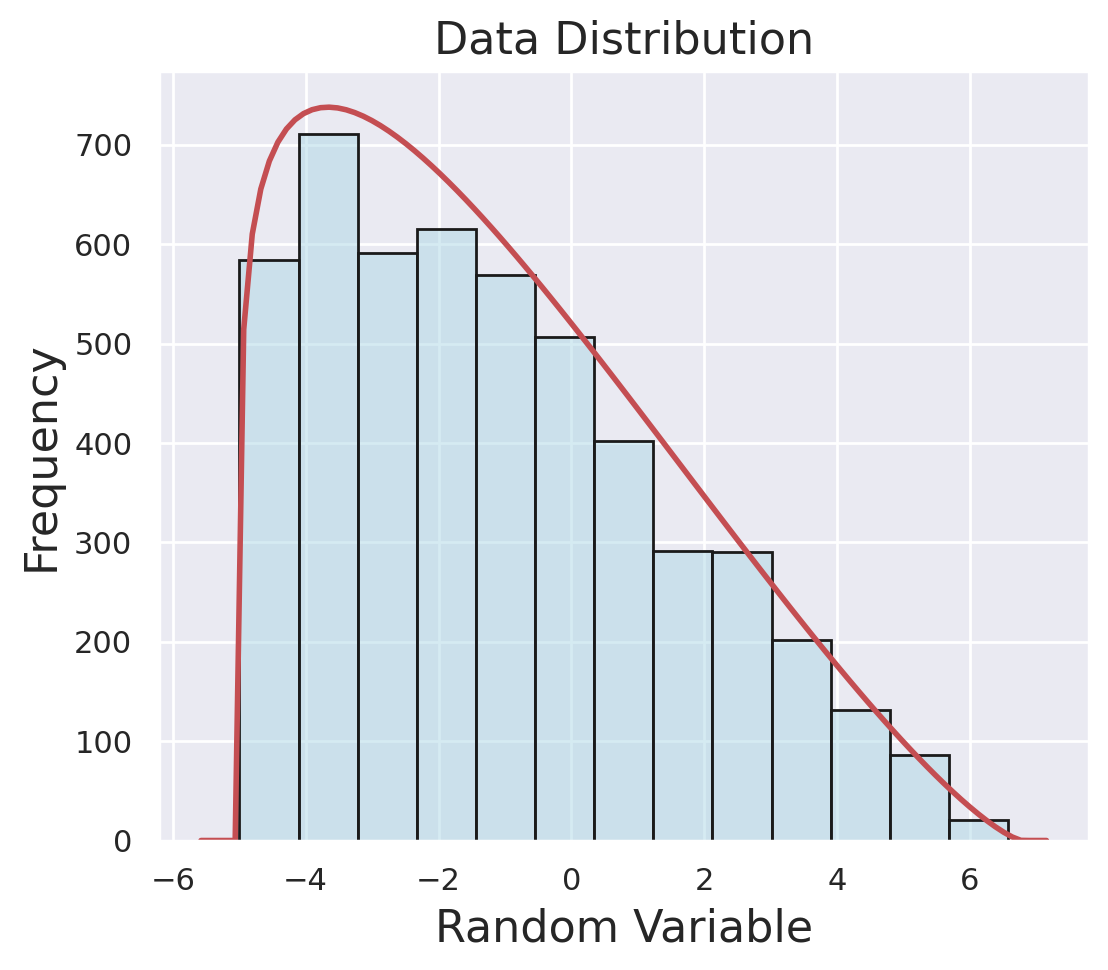

In [ ]:
data_beta = beta.rvs(a=1.2,b=2.45,loc=-5,scale=12, size=5000)
# a and b are the alpha and beta parameters
# then we want to display the histogram and the fit of the underlying distribution:
show_dist = distribution_plot(beta,bins=13,pdf_color='red')
show_dist.fit(data_beta)

In [ ]:
beta.fit(data_beta)

(1.1697549901883002, 2.360820594820564, -4.99941044981584, 11.954046843544095)

### Example with Exponential Distributions



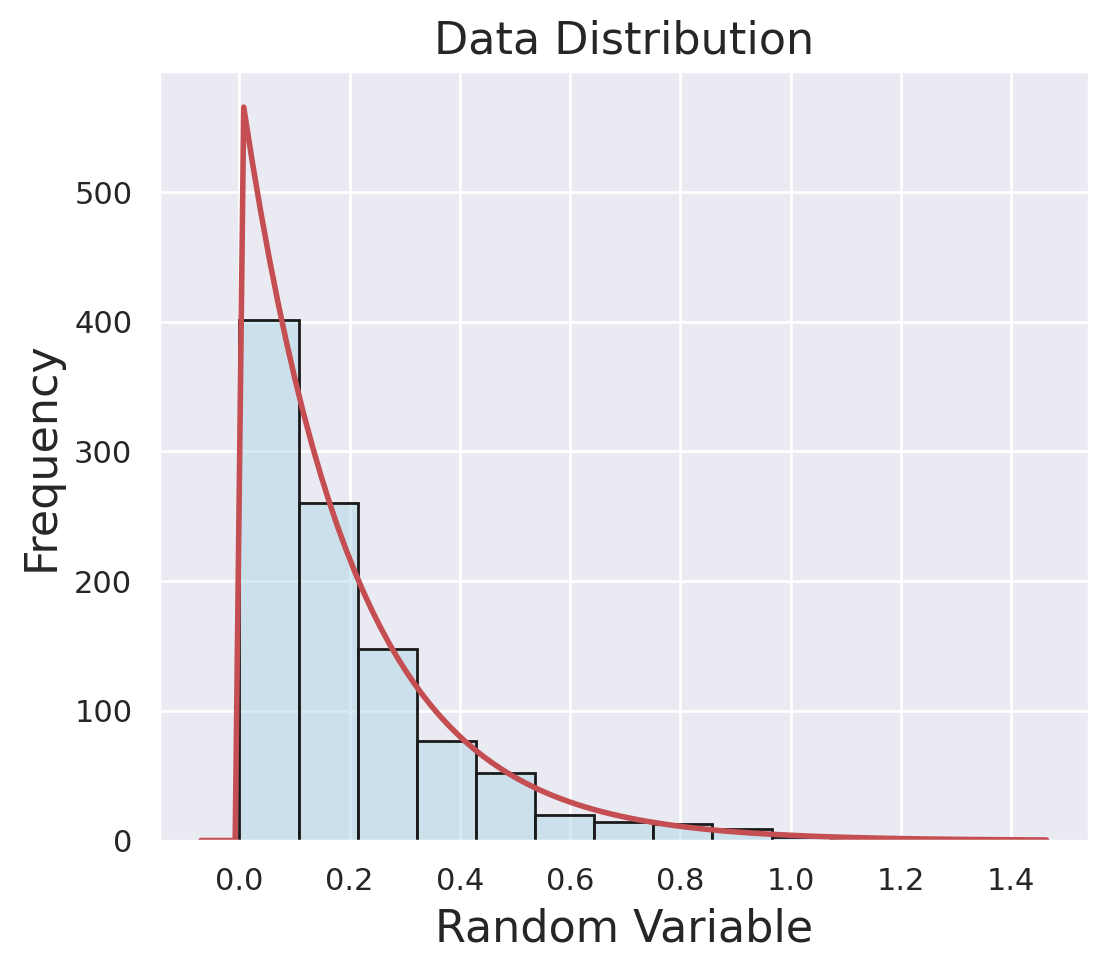

In [ ]:
data_expon = expon.rvs(scale=0.2,loc=0,size=1000)
# then we want to display the histogram and the fit of the underlying distribution:
show_dist = distribution_plot(expon,bins=13,pdf_color='red')
show_dist.fit(data_expon)

### Numerical confirmation of the Central Limit Theorem



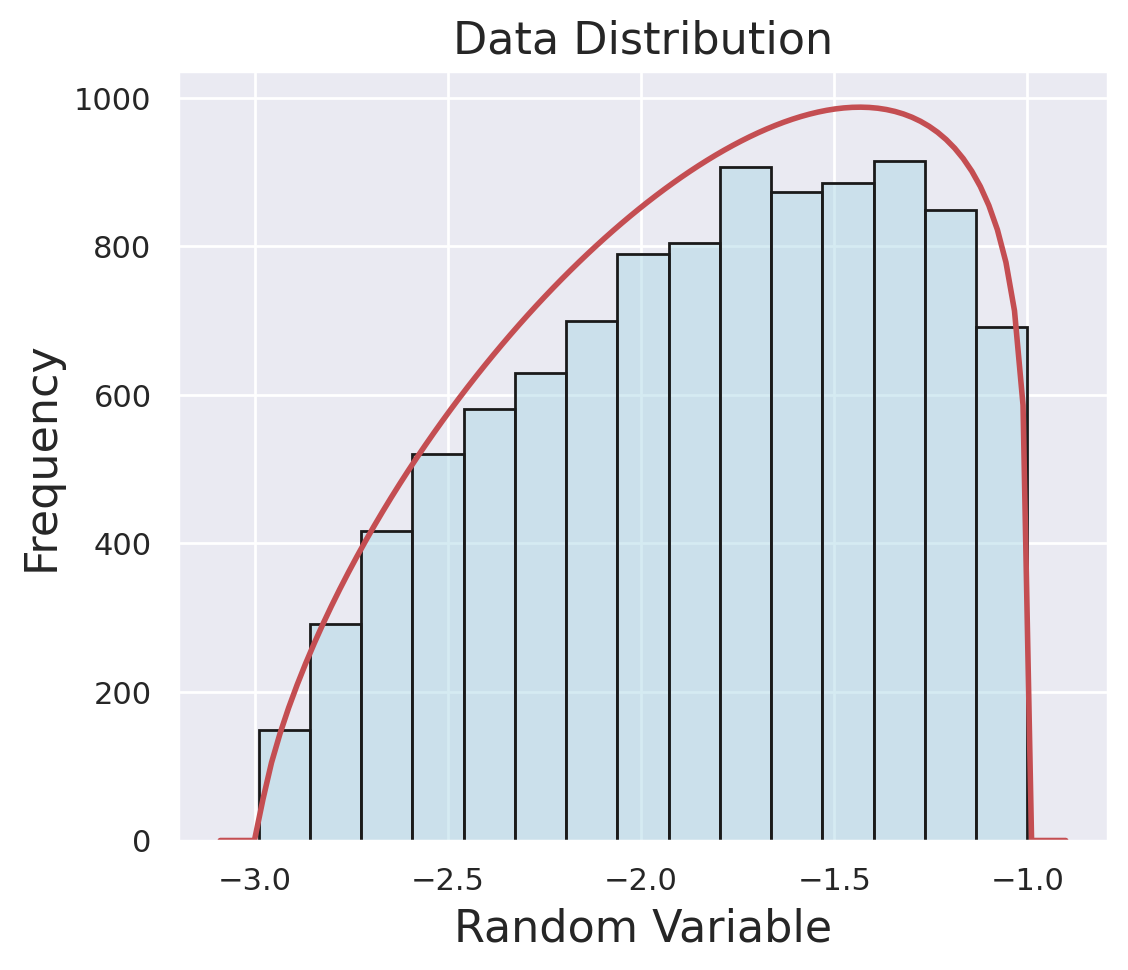

In [ ]:
data_beta = beta.rvs(a=1.7,b=1.2,loc=-3,scale=2, size=10000)
# a is alpha and b is beta
# then we want to display the histogram and the fit of the underlying distribution:
show_dist = distribution_plot(beta,bins=15,pdf_color='red')
show_dist.fit(data_beta)

In [ ]:
population = data_beta

In [ ]:
# we want to simulate many simple random samples
samples = [np.random.choice(population,30,replace=False) for _i in range(200)]

In [ ]:
# here we want to get the sample means
# one way to do that is to make samples a 2-dimensional array
means = np.mean(np.array(samples),axis=1)

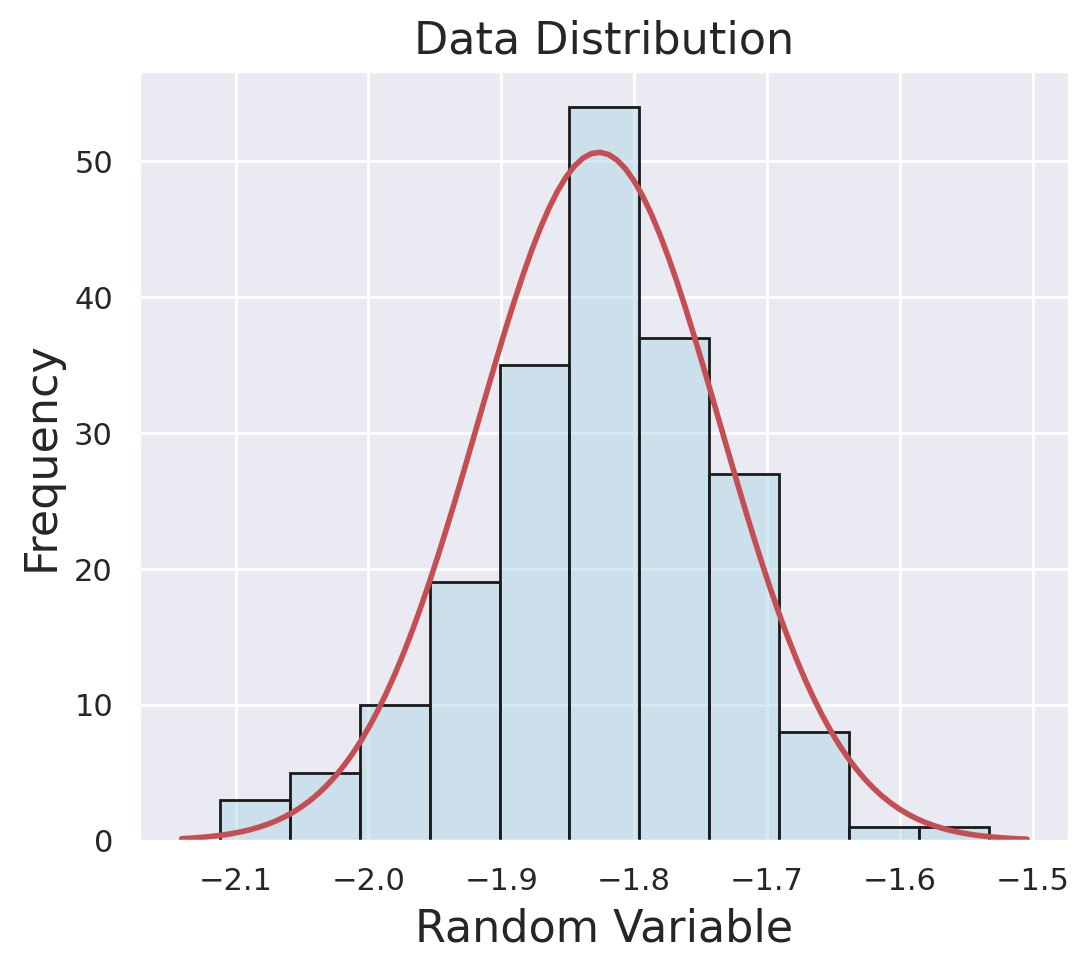

In [ ]:
show_dist = distribution_plot(norm,bins=11,pdf_color='red')
show_dist.fit(means)